In [1]:
from google.colab import files
uploaded = files.upload()

Saving audit_data.csv to audit_data.csv


In [2]:
# ============================================
# 1. IMPORT DES BIBLIOTHÈQUES
# ============================================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# ============================================
# 2. CHARGEMENT ET INSPECTION DES DONNÉES
# ============================================

df = pd.read_csv("audit_data.csv")

print("1. Aperçu des données :")
print(df.head())
print(f"\nDimensions : {df.shape}")

print("\n2. Informations sur les types de données :")
print(df.info())

print("\n3. Valeurs manquantes par colonne :")
print(df.isnull().sum())

# ============================================
# 3. SÉPARATION FEATURES / CIBLE
# ============================================
# La cible est la dernière colonne 'Risk'
X = df.drop('Risk', axis=1)
y = df['Risk']

print(f"\n4. Séparation effectuée :")
print(f"Features (X) : {X.shape}")
print(f"Cible (y) : {y.shape}")

# ============================================
# 4. ANALYSE DE L'ÉQUILIBRE DES CLASSES
# ============================================
print("\n5. Distribution des classes (Risk) :")
print(y.value_counts())
print(f"\nPourcentage :\n{y.value_counts(normalize=True) * 100}")

# ============================================
# 5. PRÉPARATION DES TRANSFORMATIONS
# ============================================
categorical_cols = ['LOCATION_ID']
numerical_cols = X.columns.difference(categorical_cols).tolist()

print(f"\n6. Colonnes catégorielles : {categorical_cols}")
print(f"Colonnes numériques : {numerical_cols}")

# ============================================
# 6. CRÉATION DU PIPELINE DE PRÉPROCESSING
# ============================================
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ])

# ============================================
# 7. DIVISION DES DONNÉES ET APPLICATION DES TRANSFORMATIONS
# ============================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n7. Division train/test :")
print(f"X_train : {X_train.shape}, X_test : {X_test.shape}")
print(f"y_train : {y_train.shape}, y_test : {y_test.shape}")

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Récupération des noms des colonnes après OneHotEncoding
cat_encoder = preprocessor.named_transformers_['cat']
cat_feature_names = cat_encoder.get_feature_names_out(categorical_cols)
all_feature_names = np.concatenate([numerical_cols, cat_feature_names])

print(f"\n8. Données transformées :")
print(f"X_train_processed : {X_train_processed.shape}")
print(f"X_test_processed : {X_test_processed.shape}")
print(f"\nNoms des caractéristiques après transformation : {len(all_feature_names)} colonnes")

# ============================================
# 9. VÉRIFICATION FINALE
# ============================================
print("\n9. Aperçu des données transformées (5 premières lignes) :")
print(pd.DataFrame(X_train_processed, columns=all_feature_names).head())

print("\n10. Vérification des distributions :")
print("Moyennes des features d'entraînement (devraient être proches de 0) :")
print(np.mean(X_train_processed, axis=0)[:5])
print("\nÉcarts-types :")
print(np.std(X_train_processed, axis=0)[:5])

print("\nPréparation terminée ! Données prêtes pour l'entraînement des modèles.")

1. Aperçu des données :
   Sector_score LOCATION_ID  PARA_A  Score_A  Risk_A  PARA_B  Score_B  Risk_B  \
0          3.89          23    4.18      0.6   2.508    2.50      0.2   0.500   
1          3.89           6    0.00      0.2   0.000    4.83      0.2   0.966   
2          3.89           6    0.51      0.2   0.102    0.23      0.2   0.046   
3          3.89           6    0.00      0.2   0.000   10.80      0.6   6.480   
4          3.89           6    0.00      0.2   0.000    0.08      0.2   0.016   

   TOTAL  numbers  ...  RiSk_E  History  Prob  Risk_F  Score  Inherent_Risk  \
0   6.68      5.0  ...     0.4        0   0.2     0.0    2.4          8.574   
1   4.83      5.0  ...     0.4        0   0.2     0.0    2.0          2.554   
2   0.74      5.0  ...     0.4        0   0.2     0.0    2.0          1.548   
3  10.80      6.0  ...     0.4        0   0.2     0.0    4.4         17.530   
4   0.08      5.0  ...     0.4        0   0.2     0.0    2.0          1.416   

   CONTROL_RIS

In [3]:
# ============================================
# Nettoyage supplémentaire des données
# ============================================

# 1. Supprimer la colonne constante (Detection_Risk a écart-type = 0)
print("\nVérification des colonnes constantes :")
constant_cols = [col for col in df.columns if df[col].nunique() == 1]
print(f"Colonnes constantes à supprimer : {constant_cols}")

if constant_cols:
    df = df.drop(columns=constant_cols)
    print(f"Colonnes {constant_cols} supprimées.")

# 2. Gérer les colonnes dupliquées (Score_B et Score_B.1)
print("\nVérification des colonnes dupliquées :")
# Vérifiez si les deux colonnes sont identiques
if 'Score_B' in df.columns and 'Score_B.1' in df.columns:
    are_identical = df['Score_B'].equals(df['Score_B.1'])
    print(f"Score_B et Score_B.1 sont identiques ? {are_identical}")

    # Si identiques, supprimez l'une des deux
    if are_identical:
        df = df.drop(columns=['Score_B.1'])
        print("Colonne 'Score_B.1' supprimée (duplicata de 'Score_B').")
    else:
        print("Les colonnes sont différentes. Renommez 'Score_B.1' pour éviter la confusion.")
        df = df.rename(columns={'Score_B.1': 'Score_B_2'})

# 3. Réafficher les informations
print(f"\nNouvelles dimensions : {df.shape}")
print(f"Nouvelles colonnes : {list(df.columns)}")


🔍 Vérification des colonnes constantes :
Colonnes constantes à supprimer : ['Detection_Risk']
Colonnes ['Detection_Risk'] supprimées.

🔍 Vérification des colonnes dupliquées :
Score_B et Score_B.1 sont identiques ? False
Les colonnes sont différentes. Renommez 'Score_B.1' pour éviter la confusion.

Nouvelles dimensions : (775, 26)
Nouvelles colonnes : ['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B', 'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B_2', 'Risk_C', 'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E', 'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK', 'Audit_Risk', 'Risk']


In [4]:
# ============================================
# TEST RAPIDE DE 8 MODÈLES
# ============================================
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Définition des 8 modèles
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced'),
    'Random Forest': RandomForestClassifier(class_weight='balanced', n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100),
    'SVM': SVC(class_weight='balanced'),
    'k-NN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'MLP': MLPClassifier(max_iter=1000, hidden_layer_sizes=(50, 25))
}

# Stockage des résultats
results = []

# Entraînement et évaluation de chaque modèle
for name, model in models.items():
    # Entraînement
    model.fit(X_train_processed, y_train)

    # Prédictions
    y_pred = model.predict(X_test_processed)

    # Calcul des métriques
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Stockage
    results.append({
        'Modèle': name,
        'Accuracy': round(accuracy, 4),
        'Precision': round(precision, 4),
        'Recall': round(recall, 4),
        'F1-Score': round(f1, 4)
    })

    print(f"{name} - Accuracy: {accuracy:.4f}, F1: {f1:.4f}")

# Affichage des résultats sous forme de tableau
results_df = pd.DataFrame(results)
print("\n" + "="*60)
print("COMPARAISON DES 8 MODÈLES")
print("="*60)
print(results_df.to_string(index=False))

# Trouver le meilleur modèle selon le F1-Score (important pour les classes déséquilibrées)
best_model = results_df.loc[results_df['F1-Score'].idxmax()]
print(f"\n⭐ MEILLEUR MODÈLE : {best_model['Modèle']}")
print(f"   F1-Score: {best_model['F1-Score']}, Accuracy: {best_model['Accuracy']}")

Logistic Regression - Accuracy: 0.9806, F1: 0.9756
Decision Tree - Accuracy: 1.0000, F1: 1.0000
Random Forest - Accuracy: 1.0000, F1: 1.0000
Gradient Boosting - Accuracy: 1.0000, F1: 1.0000
SVM - Accuracy: 0.9677, F1: 0.9587
k-NN - Accuracy: 0.9613, F1: 0.9483
Naive Bayes - Accuracy: 0.9161, F1: 0.8908
MLP - Accuracy: 0.9806, F1: 0.9748

COMPARAISON DES 8 MODÈLES
             Modèle  Accuracy  Precision  Recall  F1-Score
Logistic Regression    0.9806     0.9677  0.9836    0.9756
      Decision Tree    1.0000     1.0000  1.0000    1.0000
      Random Forest    1.0000     1.0000  1.0000    1.0000
  Gradient Boosting    1.0000     1.0000  1.0000    1.0000
                SVM    0.9677     0.9667  0.9508    0.9587
               k-NN    0.9613     1.0000  0.9016    0.9483
        Naive Bayes    0.9161     0.9138  0.8689    0.8908
                MLP    0.9806     1.0000  0.9508    0.9748

⭐ MEILLEUR MODÈLE : Decision Tree
   F1-Score: 1.0, Accuracy: 1.0


<Figure size 1200x600 with 0 Axes>

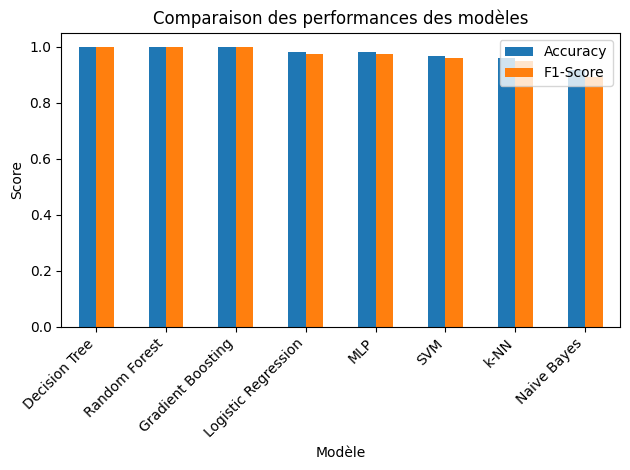

In [5]:
import matplotlib.pyplot as plt

# Trier les résultats par F1-Score
results_df = results_df.sort_values('F1-Score', ascending=False)

# Graphique comparatif
plt.figure(figsize=(12, 6))
results_df.set_index('Modèle')[['Accuracy', 'F1-Score']].plot(kind='bar')
plt.title('Comparaison des performances des modèles')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

🔍 ANALYSE APPROFONDIE DES RÉSULTATS

1. TOP 10 des caractéristiques les plus corrélées avec la cible :
District_Loss     0.093861
LOCATION_ID_16    0.085970
LOCATION_ID_20    0.085967
Inherent_Risk     0.083399
Score_B.1         0.081046
LOCATION_ID_31    0.079741
Score_MV          0.077336
LOCATION_ID_18    0.076426
LOCATION_ID_36    0.074374
LOCATION_ID_22    0.073780
dtype: float64

2. Validation croisée (5 folds) pour vérifier l'overfitting :


/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Decision Tree: F1-Score CV = 0.9979 (±0.0041)
Random Forest: F1-Score CV = 0.9979 (±0.0041)
Gradient Boosting: F1-Score CV = 0.9979 (±0.0041)

3. Vérification de l'identifiant 'LOCATION_ID':
Nombre de valeurs uniques dans LOCATION_ID: 44
Nombre d'échantillons d'entraînement: 620

4. Courbes d'apprentissage du Decision Tree:


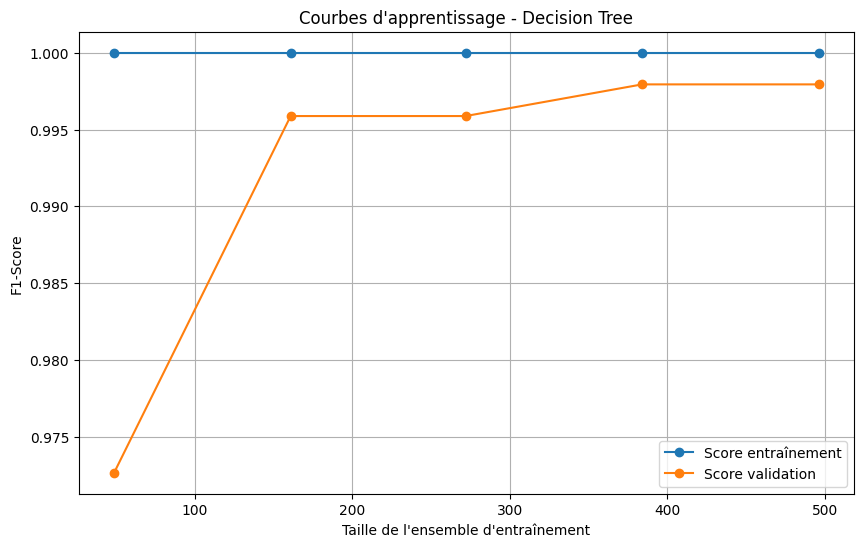


5. Top 10 des caractéristiques les plus importantes (Random Forest):
          Feature  Importance
0      Audit_Risk    0.242496
5   Inherent_Risk    0.146932
23          TOTAL    0.100900
17          Score    0.093407
15         Risk_D    0.056907
8          PARA_B    0.050560
6     Money_Value    0.048705
21       Score_MV    0.039622
3   District_Loss    0.037050
1    CONTROL_RISK    0.034886

6. Vérification des doublons dans les données:
Nombre de doublons dans X_train: 9
Nombre de doublons dans X_test: 0

7. Test sans la variable LOCATION_ID:
Test de Random Forest sans LOCATION_ID:
Accuracy: 1.0000
F1-Score: 1.0000


In [6]:
# ============================================
# ANALYSE DES PERFORMANCES SUSPECTES
# ============================================
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, learning_curve

print("🔍 ANALYSE APPROFONDIE DES RÉSULTATS")
print("="*60)

# 1. Vérifier la corrélation avec la cible
print("\n1. TOP 10 des caractéristiques les plus corrélées avec la cible :")
correlations = pd.DataFrame(X_train_processed, columns=all_feature_names).corrwith(y_train).abs().sort_values(ascending=False)
print(correlations.head(10))

# 2. Validation croisée sur les modèles trop performants
print("\n2. Validation croisée (5 folds) pour vérifier l'overfitting :")
models_to_check = {
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced'),
    'Random Forest': RandomForestClassifier(class_weight='balanced', n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100)
}

for name, model in models_to_check.items():
    cv_scores = cross_val_score(model, X_train_processed, y_train, cv=5, scoring='f1')
    print(f"{name}: F1-Score CV = {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

# 3. Vérifier si une variable est un identifiant
print("\n3. Vérification de l'identifiant 'LOCATION_ID':")
print(f"Nombre de valeurs uniques dans LOCATION_ID: {X_train['LOCATION_ID'].nunique()}")
print(f"Nombre d'échantillons d'entraînement: {len(X_train)}")

# 4. Courbes d'apprentissage pour le Decision Tree
print("\n4. Courbes d'apprentissage du Decision Tree:")
model = DecisionTreeClassifier(class_weight='balanced')
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train_processed, y_train, cv=5,
    scoring='f1', train_sizes=np.linspace(0.1, 1.0, 5)
)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Score entraînement')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Score validation')
plt.xlabel('Taille de l\'ensemble d\'entraînement')
plt.ylabel('F1-Score')
plt.title('Courbes d\'apprentissage - Decision Tree')
plt.legend()
plt.grid(True)
plt.show()

# 5. Importance des caractéristiques pour Random Forest
print("\n5. Top 10 des caractéristiques les plus importantes (Random Forest):")
rf = RandomForestClassifier(class_weight='balanced', n_estimators=100)
rf.fit(X_train_processed, y_train)

feature_importance = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance.head(10))

# 6. Vérifier s'il y a des doublons
print("\n6. Vérification des doublons dans les données:")
print(f"Nombre de doublons dans X_train: {pd.DataFrame(X_train_processed).duplicated().sum()}")
print(f"Nombre de doublons dans X_test: {pd.DataFrame(X_test_processed).duplicated().sum()}")

# 7. Tester sans la variable LOCATION_ID (potentiel identifiant)
print("\n7. Test sans la variable LOCATION_ID:")
# Recréer X sans LOCATION_ID
X_no_id = X.drop('LOCATION_ID', axis=1)
numerical_cols_no_id = [col for col in numerical_cols if col != 'LOCATION_ID']

# Recréer le préprocesseur sans l'encodeur catégoriel
preprocessor_no_id = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols_no_id)
    ])

X_train_no_id = preprocessor_no_id.fit_transform(X_train.drop('LOCATION_ID', axis=1))
X_test_no_id = preprocessor_no_id.transform(X_test.drop('LOCATION_ID', axis=1))

# Tester à nouveau les modèles
print("Test de Random Forest sans LOCATION_ID:")
rf_no_id = RandomForestClassifier(class_weight='balanced', n_estimators=100)
rf_no_id.fit(X_train_no_id, y_train)
y_pred_no_id = rf_no_id.predict(X_test_no_id)
print(f"Accuracy: {accuracy_score(y_test, y_pred_no_id):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_no_id):.4f}")

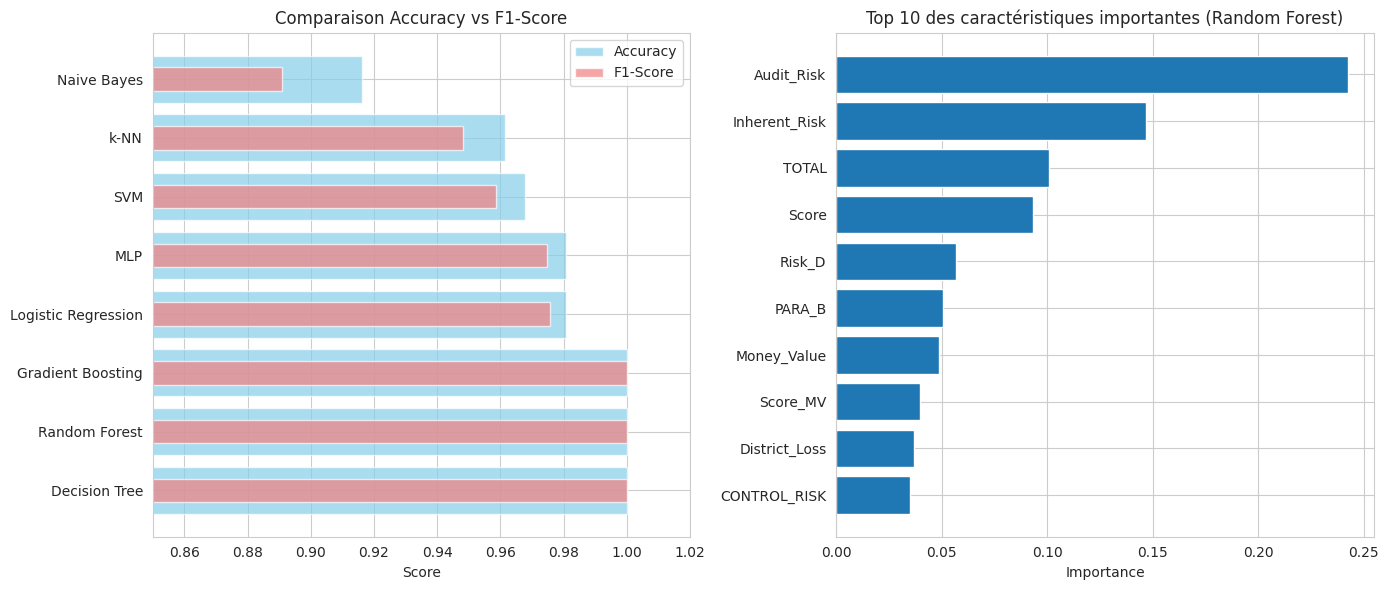

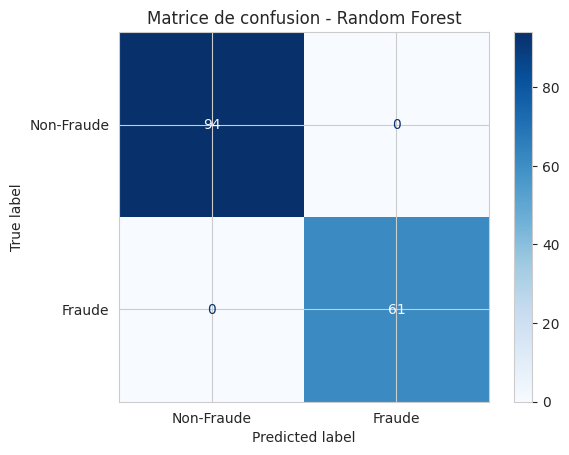

In [8]:
# ============================================
# VISUALISATIONS POUR LE RAPPORT
# ============================================
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration
sns.set_style("whitegrid")
plt.figure(figsize=(14, 6))

# Graphique 1: Comparaison des modèles
plt.subplot(1, 2, 1)
models_plot = results_df.sort_values('Accuracy', ascending=False)
x = range(len(models_plot))
plt.barh(x, models_plot['Accuracy'], color='skyblue', alpha=0.7, label='Accuracy')
plt.barh(x, models_plot['F1-Score'], color='lightcoral', alpha=0.7, label='F1-Score', height=0.4)
plt.yticks(x, models_plot['Modèle'])
plt.xlabel('Score')
plt.title('Comparaison Accuracy vs F1-Score')
plt.legend()
plt.xlim(0.85, 1.02)

# Graphique 2: Importance des caractéristiques (Top 10)
plt.subplot(1, 2, 2)
top_features = feature_importance.head(10)
plt.barh(range(len(top_features)), top_features['Importance'][::-1])
plt.yticks(range(len(top_features)), top_features['Feature'][::-1])
plt.xlabel('Importance')
plt.title('Top 10 des caractéristiques importantes (Random Forest)')
plt.tight_layout()

plt.show()

# Graphique 3: Matrice de confusion du meilleur modèle
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Prendre Random Forest comme exemple
rf = RandomForestClassifier(class_weight='balanced', n_estimators=100)
rf.fit(X_train_processed, y_train)
y_pred = rf.predict(X_test_processed)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Fraude', 'Fraude'])
disp.plot(cmap='Blues')
plt.title('Matrice de confusion - Random Forest')
plt.show()